- ## ****K-Nearest Neighbors classifier****
   - ### ****The KNN Classifier was implemented with a focus on computational efficiency. A stratified sampling strategy was employed to select 30,0000 representative instances, ensuring the model remains within memory limits while preserving the class distribution. We utilized n_neighbors=11 to provide a stable decision boundary and weights='distance' to give more influence to closer neighbors, which often improves accuracy in high-dimensional feature spaces like the one used for Instacart data****
   - ### ****The choice of $K=11$ was strategically made for two primary reasons: First, an odd number was selected to prevent voting ties during the classification process. Second, $K=11$ acts as a regularization mechanism; it is large enough to smooth out local noise and outliers in the Instacart dataset, yet small enough to maintain the local structure of the data, ensuring the model captures general consumer patterns rather than memorizing individual instances****

Starting KNN training with 300000 samples...

--- KNN (K=11) Performance Metrics ---
Accuracy              : 0.9379
Precision             : 0.4049
Recall                : 0.0226
F1-score              : 0.0428
MCC                   : 0.0839
ROC-AUC               : 0.6868
Avg Precision (AP)    : 0.1613


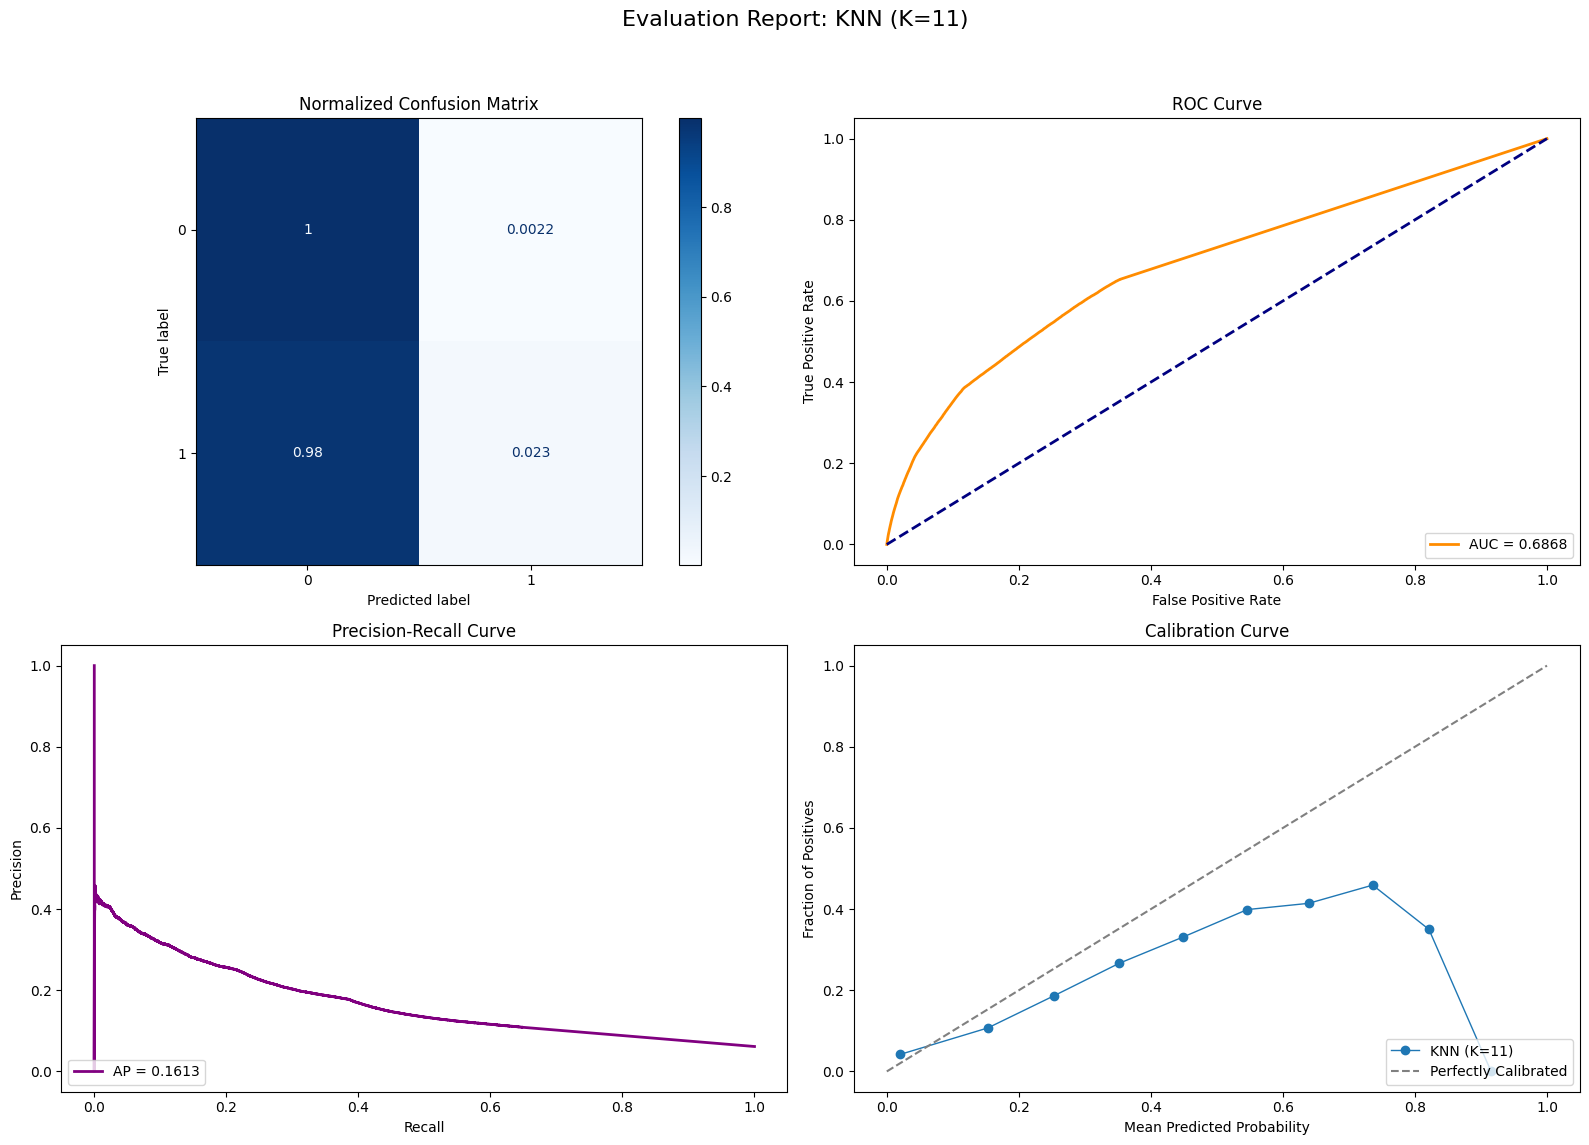

13600

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

gc.collect()

n_samples = 300000

X_train_knn, y_train_knn = resample(X_train_scaled, y_train,
                                   n_samples=n_samples,
                                   replace=False,
                                   random_state=42,
                                   stratify=y_train)

print(f"Starting KNN training with {n_samples} samples...")

knn_model = KNeighborsClassifier(n_neighbors=11, weights='distance', n_jobs=-1)

knn_model.fit(X_train_knn, y_train_knn)

knn_metrics = evaluate_model(knn_model, X_val_scaled, y_val, model_name="KNN (K=11)")

del X_train_knn, y_train_knn
gc.collect()